# Machine Learning introduction using WDBC dataset

We are provided with a dataset which has 11 columns. The column 'diagnosis' tells us if the stage of cancerous cells is
Benign(B) or Malignant(M).

The other 10 columns provide us with the mean value of respective columns.

Our goal - Predict the stage of cancerous cells(M or B) using Machine Learning techniques.

This is just a walkthrough for someone who is just begining to learn ML and I will try to keep it as simple as possible.


## Model accuracy



Decision Tree Classifier   =             0.87 

KNeighbors            =                  0.87

GaussianNB              =                0.93
 

Importing general libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing our dataset

In [101]:
# Importing just the first twelve columns.
# header=None means we do not want our first column of the data to be header.
df=pd.read_csv(r'C:\Users\13433\Downloads\wdbc.data', header=None,usecols=np.arange(0,12)) 

# naming our columns since the dataset doesn't have column names
df.columns=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Dropping 1st column named 'id' since it doesnt' provide us any usefull information.
df.drop('id',axis=1,inplace=True)

# final dataset
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [102]:
# checking null values in each column
df.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [103]:
# dividing dataset into target and data
df_target=df[['diagnosis']]

# dropping 'diagnosis' from the df_data DataFrame
df_data=df.drop('diagnosis',axis=1)

In [104]:
df_target

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


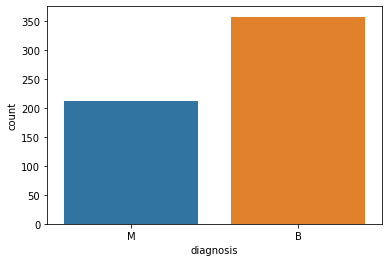

In [105]:
# Checking number of M OR B cases. 
sns.countplot(df_target['diagnosis']) # Looks like B is the more common one

In [106]:
df_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [107]:
# understanding how our data is distributed and get some statistical metrics.
df_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


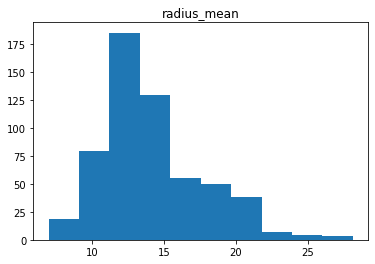

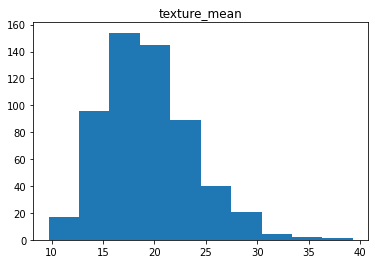

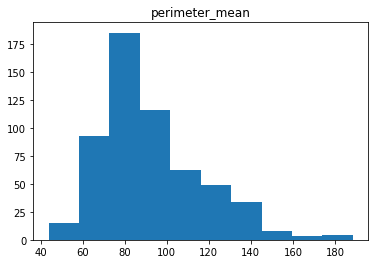

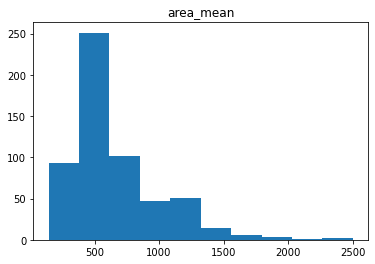

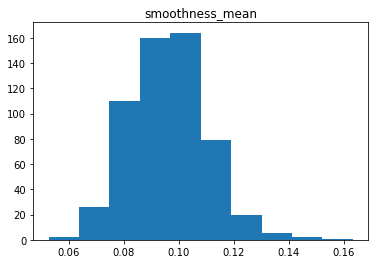

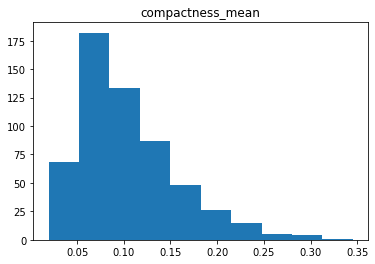

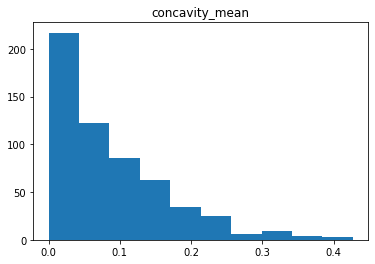

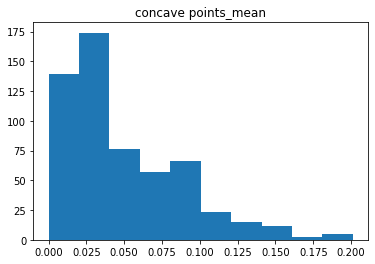

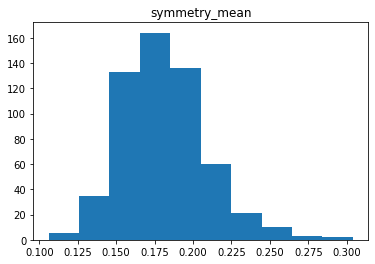

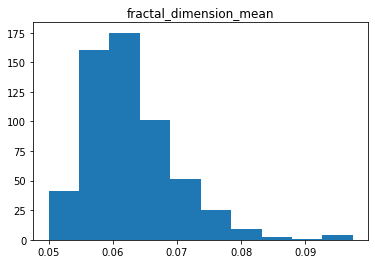

In [108]:
# plotting histograms for our numerical data. You can see how each column is distributed.

for i in df_data:
    plt.hist(df_data[i])
    plt.title(i)
    plt.show()

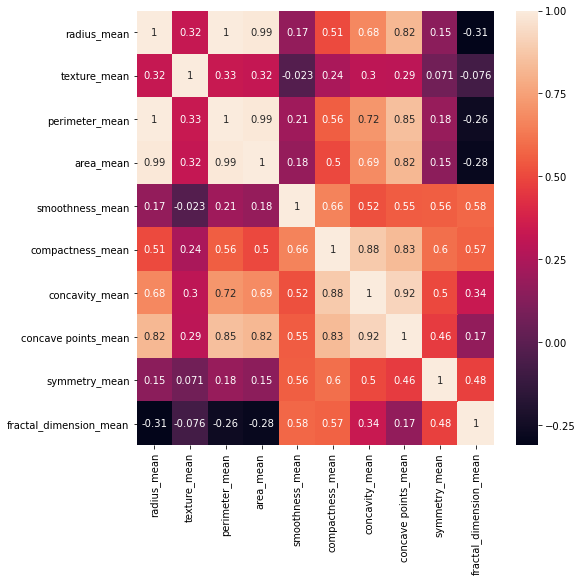

In [109]:
# plotting heatmap to find the columns which are correlated.
plt.figure(figsize=(8,8))
sns.heatmap(df_data.corr(),annot=True)

In [110]:
# Dropping columns with high correlation.(Remember we only drop one of the correlated columns)
# Generally I drop anything with correlation of more than 0.8.
# This method has its drawbacks but for this walkthrough I will keep it simple.
# This method helps us to reduce features(columns) and avoid overfitting as well. (There are better ways for feature reduction)
df_data.drop(['area_mean','concave points_mean','concavity_mean','perimeter_mean'],axis=1,inplace=True)

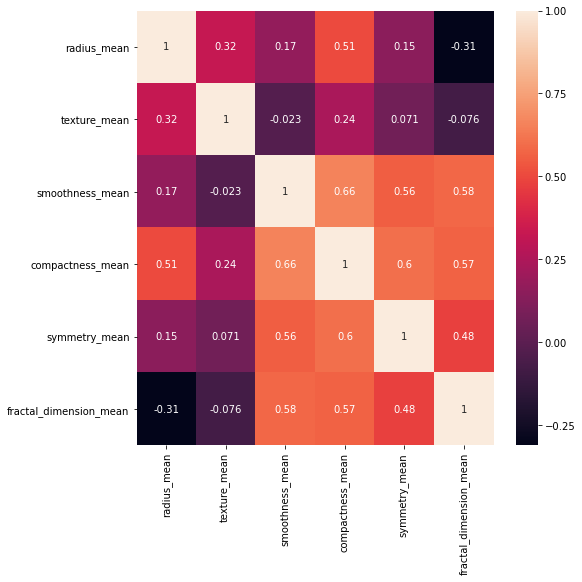

In [111]:
# Now this looks good to move forward
plt.figure(figsize=(8,8))
sns.heatmap(df_data.corr(),annot=True)

In [112]:
# splitting the data in train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df_data,df_target,random_state=1) 

In [113]:
# importing metrics that we will use later
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

## Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier # importing the model
model=DecisionTreeClassifier(random_state=1) # randomstate=1 so we can replicate our results
model.fit(xtrain,ytrain.values.ravel())
y_pred=model.predict(xtest)
accuracy_score(ytest, y_pred)

0.8741258741258742

In [115]:
print(classification_report(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))

              precision    recall  f1-score   support

           B       0.86      0.94      0.90        88
           M       0.89      0.76      0.82        55

    accuracy                           0.87       143
   macro avg       0.88      0.85      0.86       143
weighted avg       0.88      0.87      0.87       143

[[83  5]
 [13 42]]


Accuracy = 0.87

## KNeighbors

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
# Finding the best value for n_neighbors.
# This is called hyperparameter tuning. There are various hyperparameters for different models.

error=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain.values.ravel())
    y_pred_i=model.predict(xtest)
    y_pred_i=y_pred_i.reshape(143,1)
    error.append(np.mean(y_pred_i!=ytest))

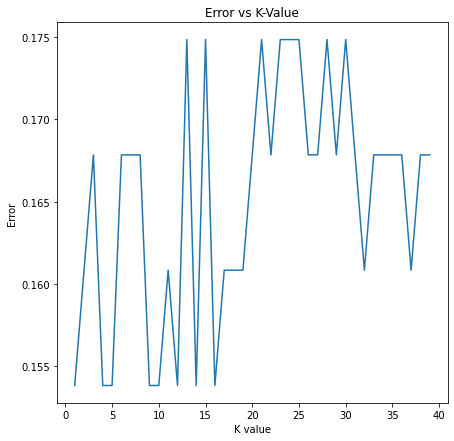

In [118]:
# plotting the error value corresponding to K-value

plt.figure(figsize=(7,7))
plt.plot(range(1,40),error)
plt.xlabel('K value')
plt.ylabel('Error')
plt.title('Error vs K-Value');

# K=4 is our optimal value

In [119]:
# running model with n_neighbors=4 (least k-value for which our error was least)

model=KNeighborsClassifier(n_neighbors=4)
model.fit(xtrain,ytrain.values.ravel())
y_pred_i=model.predict(xtest)
accuracy_score(ytest, y_pred)

0.8741258741258742

In [120]:
print(classification_report(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))

              precision    recall  f1-score   support

           B       0.86      0.94      0.90        88
           M       0.89      0.76      0.82        55

    accuracy                           0.87       143
   macro avg       0.88      0.85      0.86       143
weighted avg       0.88      0.87      0.87       143

[[83  5]
 [13 42]]


Accuracy = 0.87

## GaussianNB 

In [121]:
# for this model, let's try to find the best ratio for our test and train data. (you can do this for other models too)

performance=[]
for i in range(1,100):
    xtrain,xtest,ytrain,ytest = train_test_split(df_data,df_target,random_state=1,test_size=i/100) 
    model=GaussianNB()
    model.fit(xtrain,ytrain.values.ravel())
    y_pred=model.predict(xtest)
    performance.append(accuracy_score(ytest, y_pred))

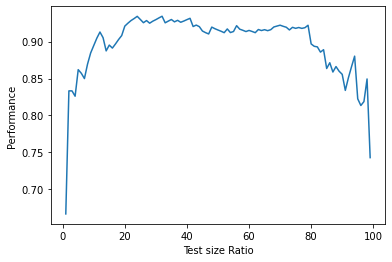

In [122]:
sns.lineplot(range(1,100),performance).set(xlabel='Test size Ratio',ylabel='Performance');

In [123]:
p=performance.index(max(performance))
print('max performance of the model is when test size = ', p )

max performance of the model is when test size =  31


In [124]:
# splitting our data according to our finding and running our model
xtrain,xtest,ytrain,ytest = train_test_split(df_data,df_target,test_size=.31,random_state=1) 

In [125]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain.values.ravel())
y_pred=model.predict(xtest)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9322033898305084

In [127]:
print(classification_report(ytest,y_pred))
print(confusion_matrix(ytest,y_pred))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       114
           M       0.95      0.86      0.90        63

    accuracy                           0.93       177
   macro avg       0.94      0.92      0.92       177
weighted avg       0.93      0.93      0.93       177

[[111   3]
 [  9  54]]


Accuracy = 0.93